In [129]:
import numpy as np
import ChebTools as ct
import matplotlib.pyplot as plt
%matplotlib inline

In [130]:
import matplotlib as mpl
#mpl.rc('lines', linewidth=2, color='r')
plt.style.available

['seaborn-deep',
 'seaborn-dark-palette',
 'dark_background',
 'seaborn-colorblind',
 'grayscale',
 'fivethirtyeight',
 'bmh',
 'seaborn-dark',
 'classic',
 'seaborn-pastel',
 'ggplot',
 'seaborn-notebook',
 'seaborn-paper',
 'seaborn-ticks',
 'seaborn-bright',
 'seaborn-white',
 'seaborn-muted',
 'seaborn-darkgrid',
 'seaborn-talk',
 'seaborn-whitegrid',
 'seaborn-poster']

In [131]:
mpl.rcParams

RcParams({'agg.path.chunksize': 0,
          'animation.avconv_args': [],
          'animation.avconv_path': 'avconv',
          'animation.bitrate': -1,
          'animation.codec': 'mpeg4',
          'animation.convert_args': [],
          'animation.convert_path': 'convert',
          'animation.ffmpeg_args': [],
          'animation.ffmpeg_path': 'ffmpeg',
          'animation.frame_format': 'png',
          'animation.html': 'none',
          'animation.mencoder_args': [],
          'animation.mencoder_path': 'mencoder',
          'animation.writer': 'ffmpeg',
          'axes.axisbelow': False,
          'axes.edgecolor': 'k',
          'axes.facecolor': 'w',
          'axes.formatter.limits': [-7, 7],
          'axes.formatter.use_locale': False,
          'axes.formatter.use_mathtext': False,
          'axes.formatter.useoffset': True,
          'axes.grid': False,
          'axes.grid.axis': 'both',
          'axes.grid.which': 'major',
          'axes.hold': True,
          'a

In [132]:
plt.style.use('seaborn-poster')
mpl.rcParams['text.usetex'] = True
mpl.rcParams['text.latex.preamble'] = [
       r'\usepackage{siunitx}',   # i need upright \micro symbols, but you need...
       r'\sisetup{detect-all}',   # ...this to force siunitx to actually use your fonts
       r'\usepackage{helvet}',    # set the normal font here
       r'\usepackage{sansmath}',  # load up the sansmath so that math -> helvet
       r'\sansmath'               # <- tricky! -- gotta actually tell tex to use!
] 
#mpl.rcParams['axes.titlepad'] = 15

In [133]:
mpl.rcParams['axes.titlesize'] = 30
mpl.rcParams['legend.fontsize'] = 48
mpl.rcParams['axes.labelsize'] = 48
mpl.rcParams['xtick.labelsize'] = 28
mpl.rcParams['ytick.labelsize'] = 28

In [134]:
def f(x,y):
    r = np.sqrt(x**2+y**2)
    return np.sin(np.pi*r)
chebf = ct.ChebyshevExpansion2D.generate_Chebyshev_expansion2d(10,10,f,-1,1,-1,1)

In [135]:
chebf.z_Clenshaw(1,1)-f(1,1)

8.8817841970012523e-16

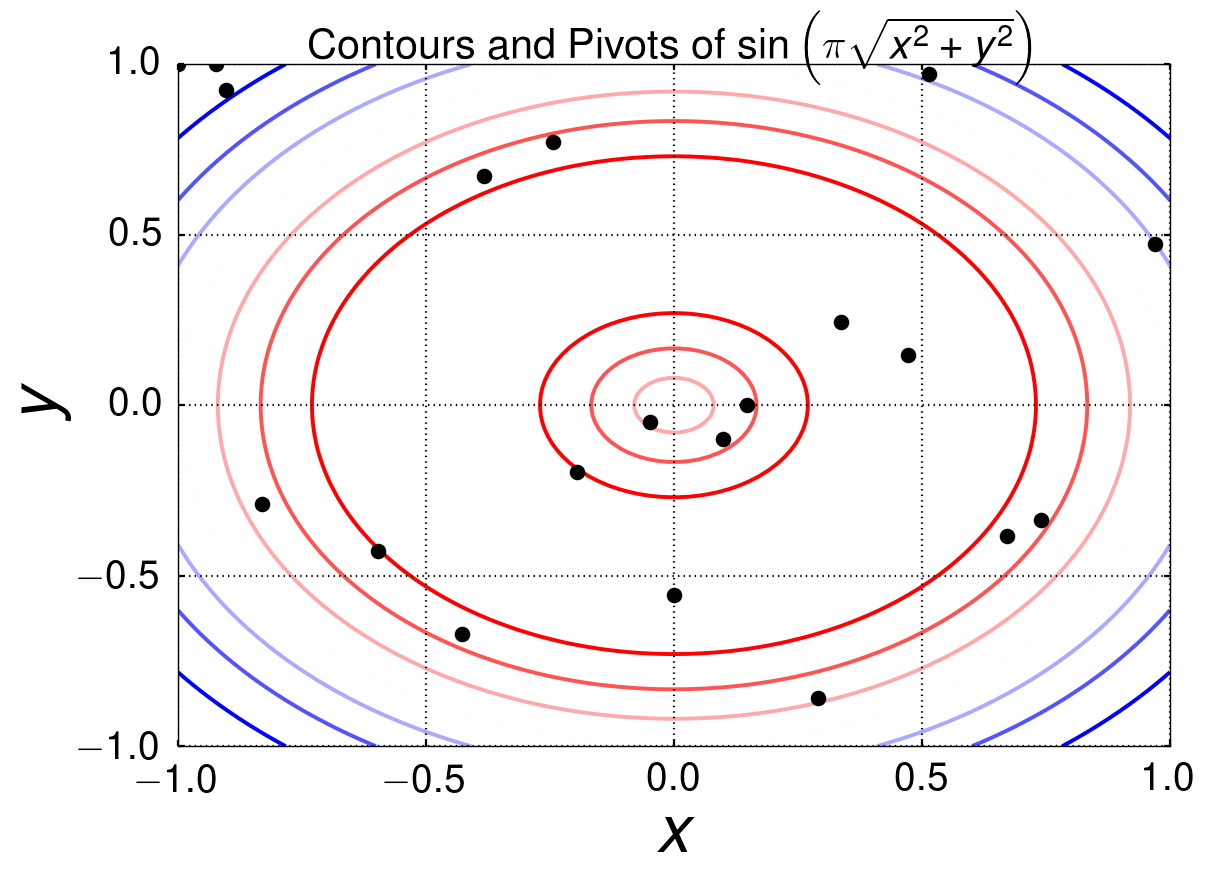

In [136]:
def f(x,y):
    r = np.sqrt(x**2+y**2)
    return np.sin(np.pi*r)
pivots = ct.ChebyshevExpansion2D.pivots_from_factory(64,64,f,-1,1,-1,1)
pivots_array = np.zeros((2,len(pivots)))
for i in range(len(pivots)):
    pivots_array[0,i] = pivots[i][0]
    pivots_array[1,i] = pivots[i][1]
colors=('r', 'b')
X, Y = np.meshgrid(np.linspace(-1,1,100), np.linspace(-1,1,100))
plt.plot(pivots_array[0,:],pivots_array[1,:],'ok')
plt.contour(X,Y,f(X,Y),cmap="bwr")
plt.ylim([-1,1])
plt.xlim([-1,1])
plt.grid()
plt.ylabel(r"$y$")
plt.xlabel(r"$x$")
plt.title(r"Contours and Pivots of $\sin\left(\pi\sqrt{x^2+y^2}\right)$")
#plt.savefig("sin_contours.pdf")


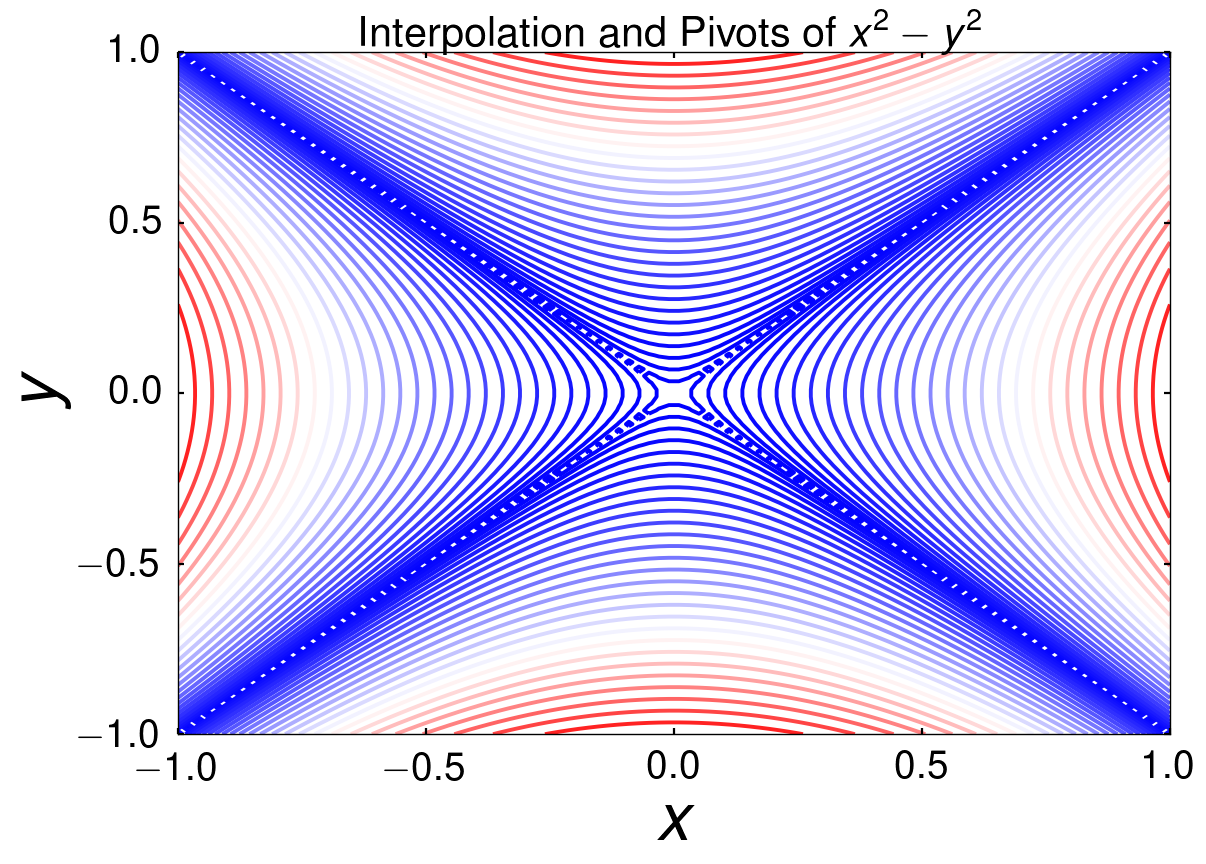

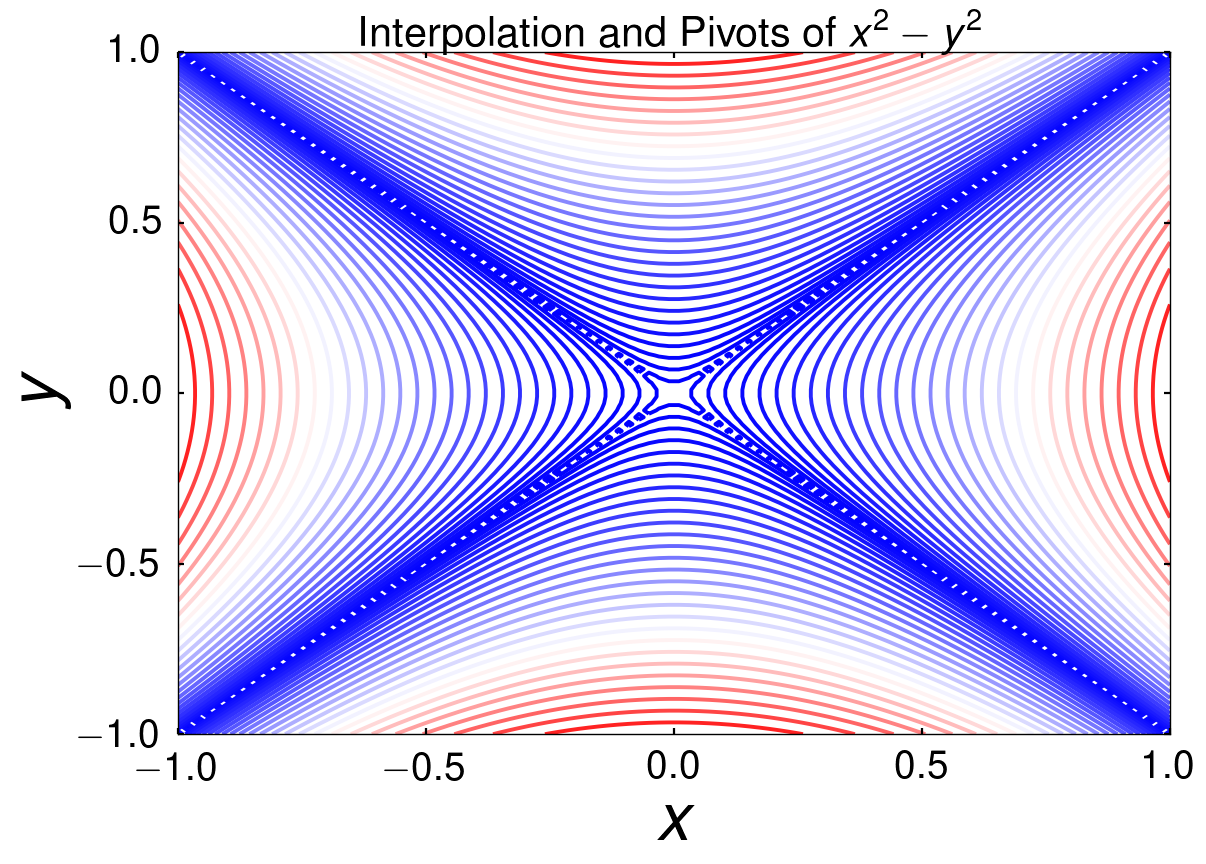

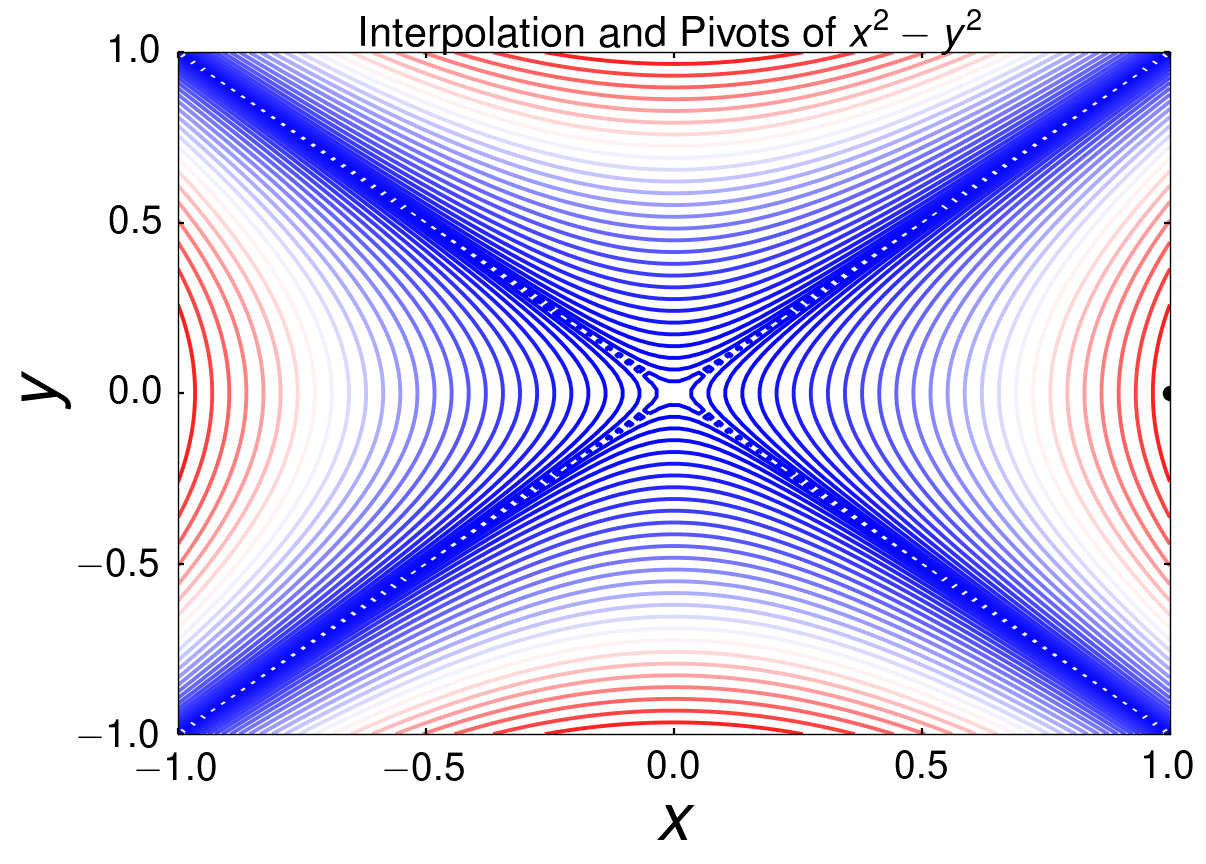

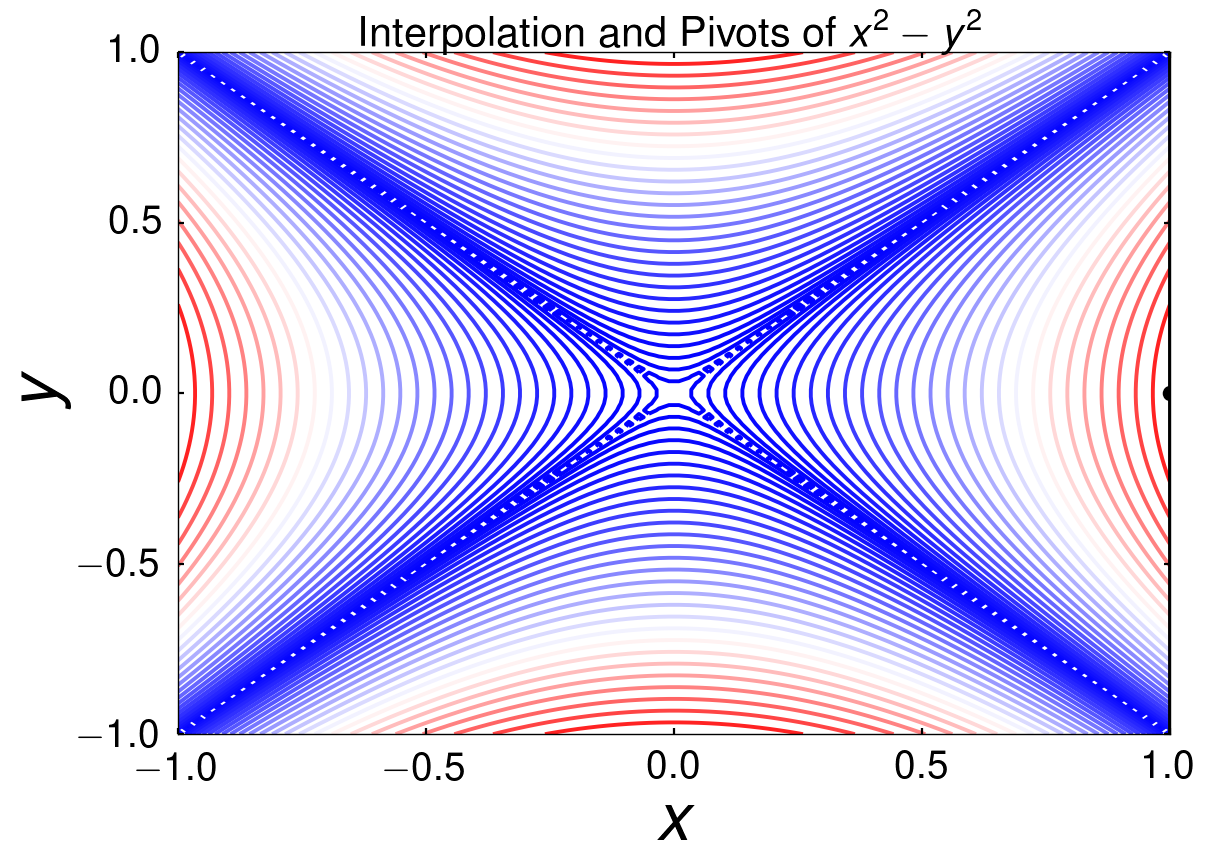

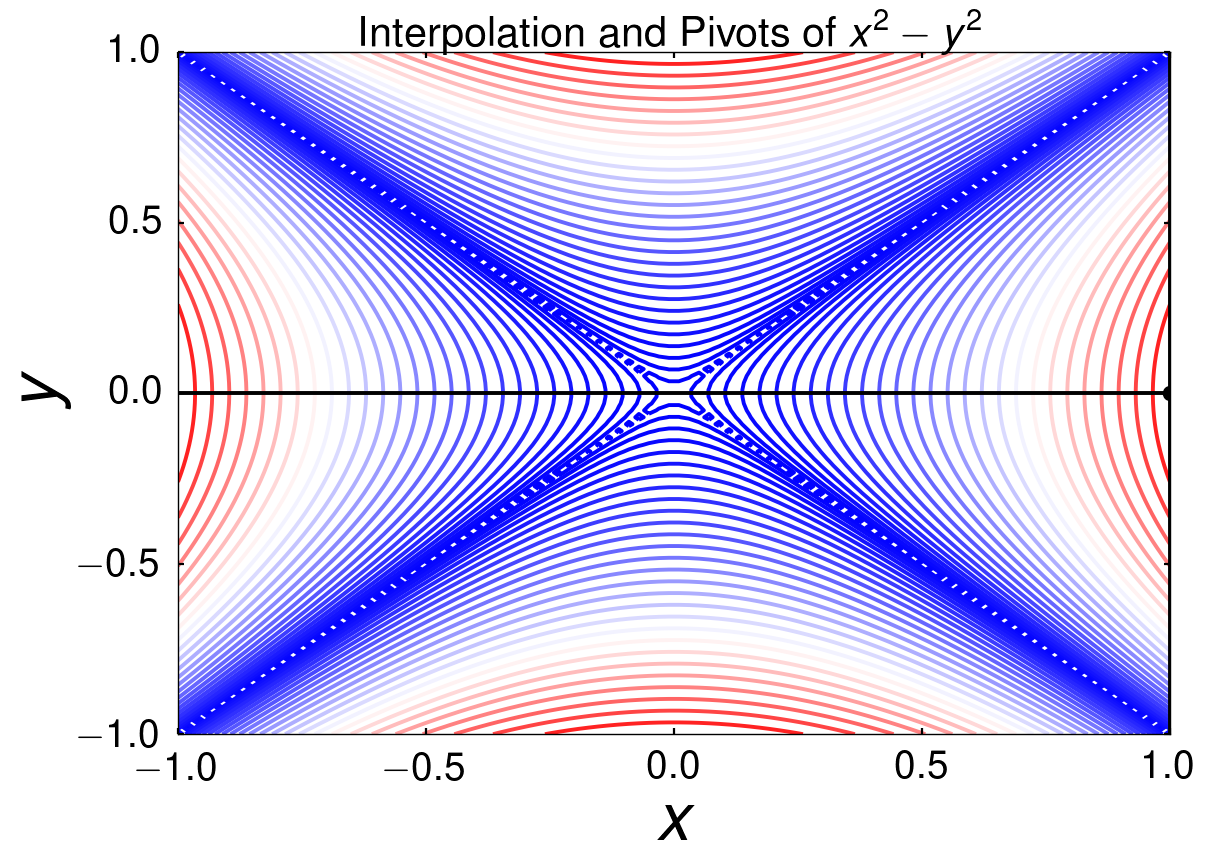

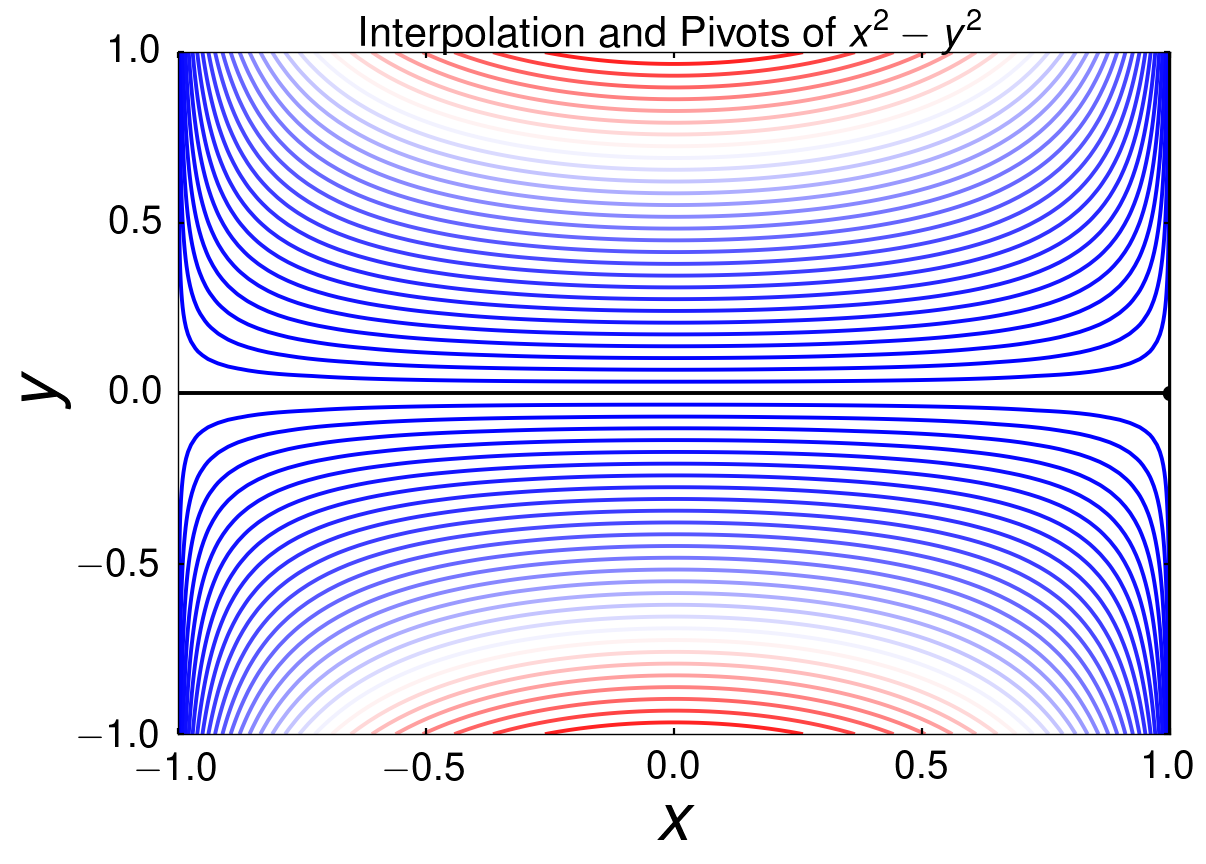

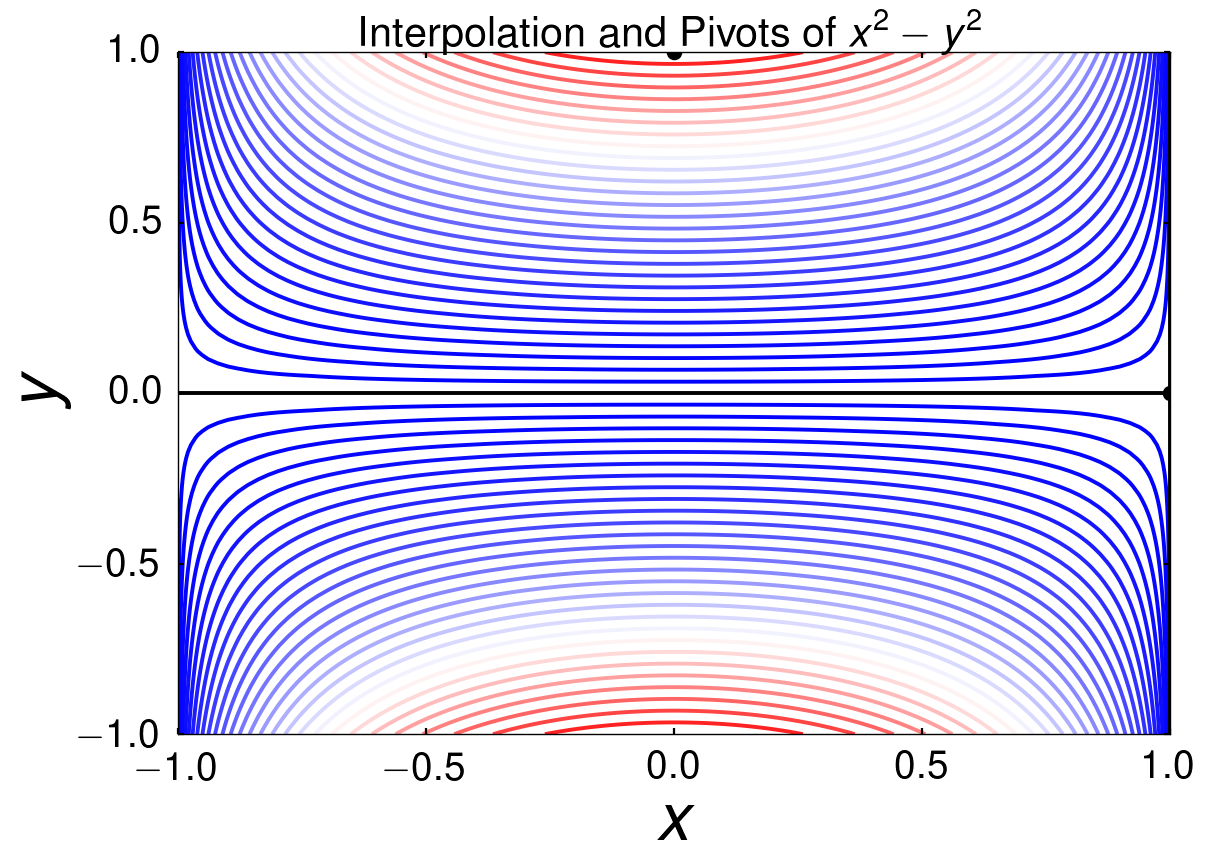

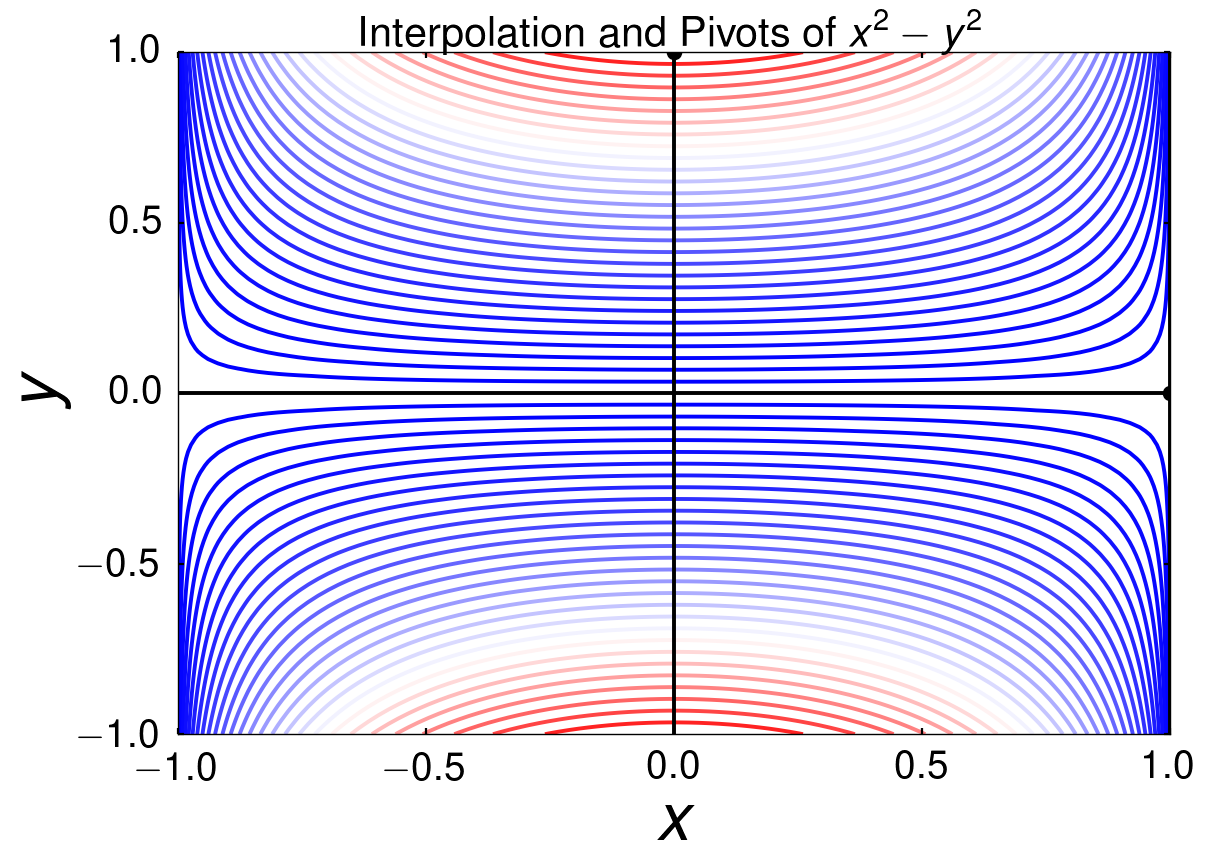

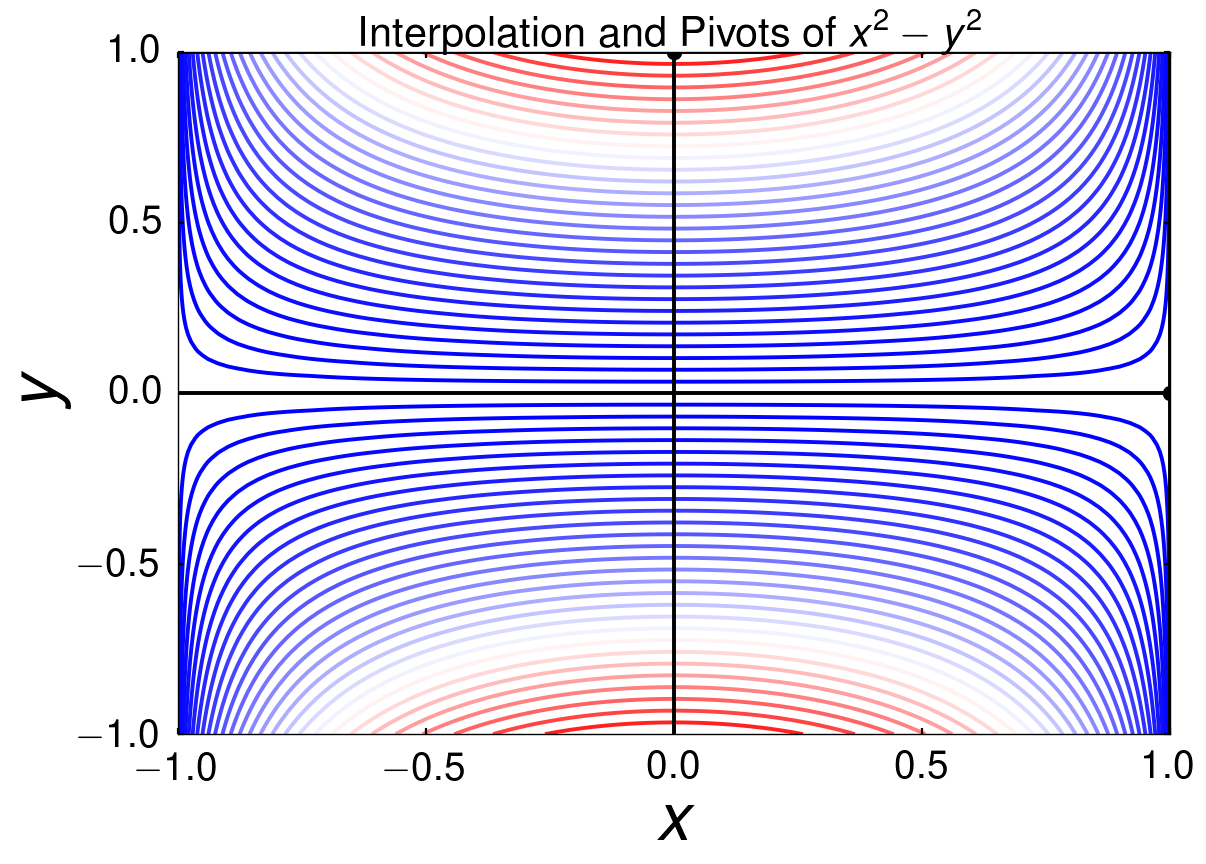

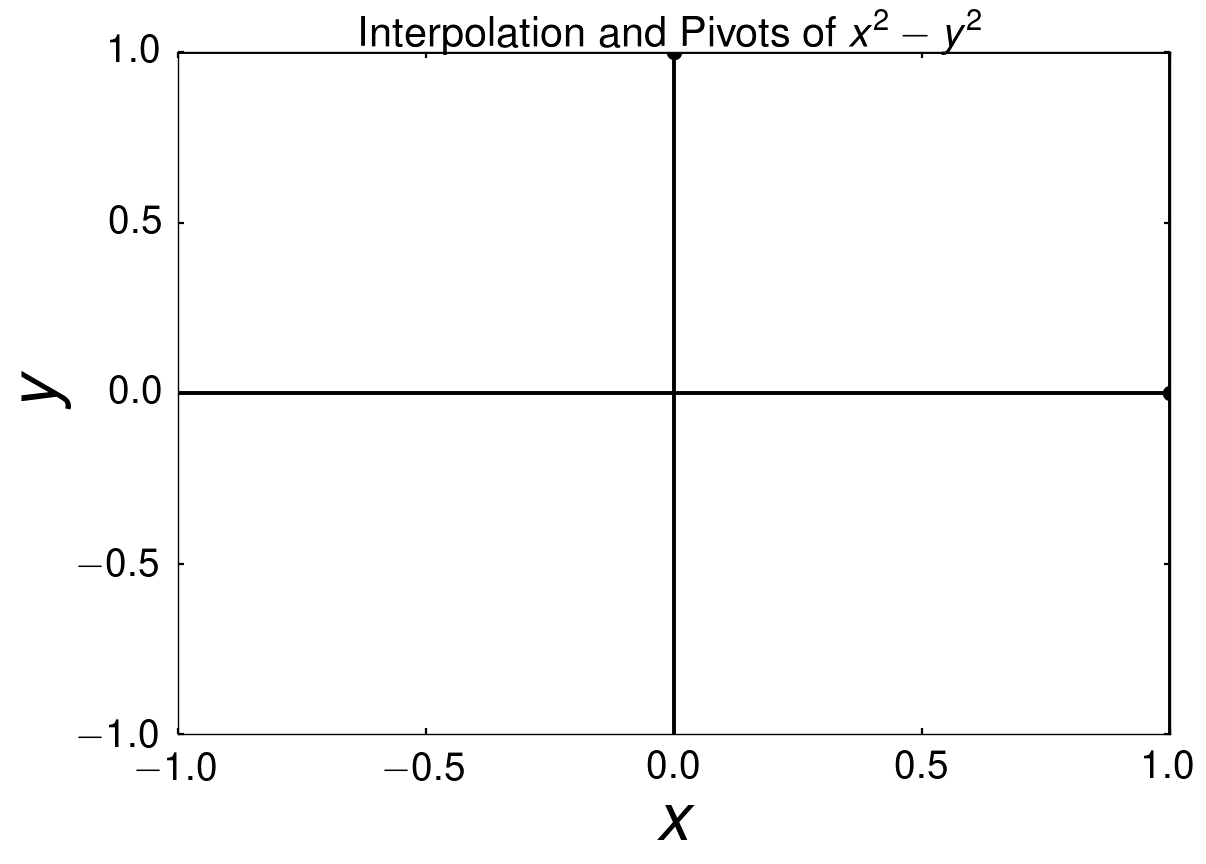

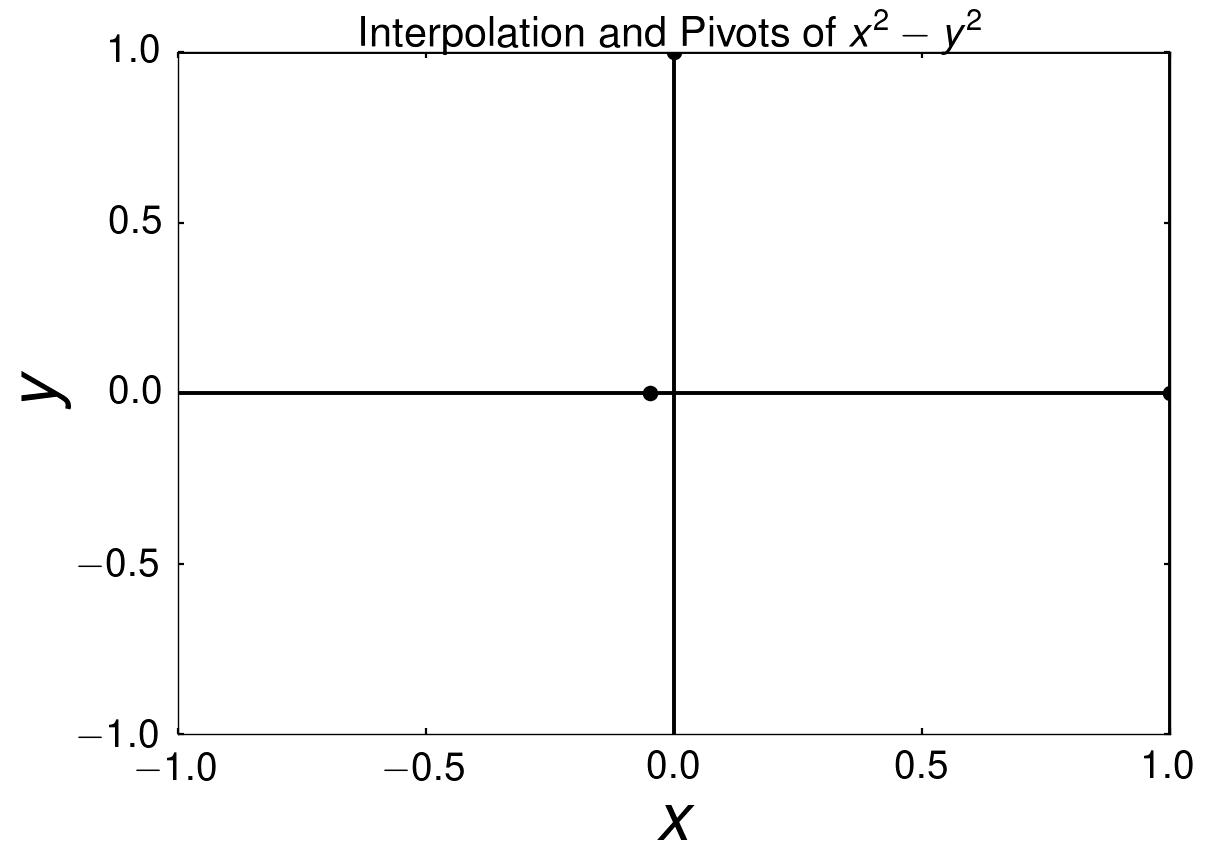

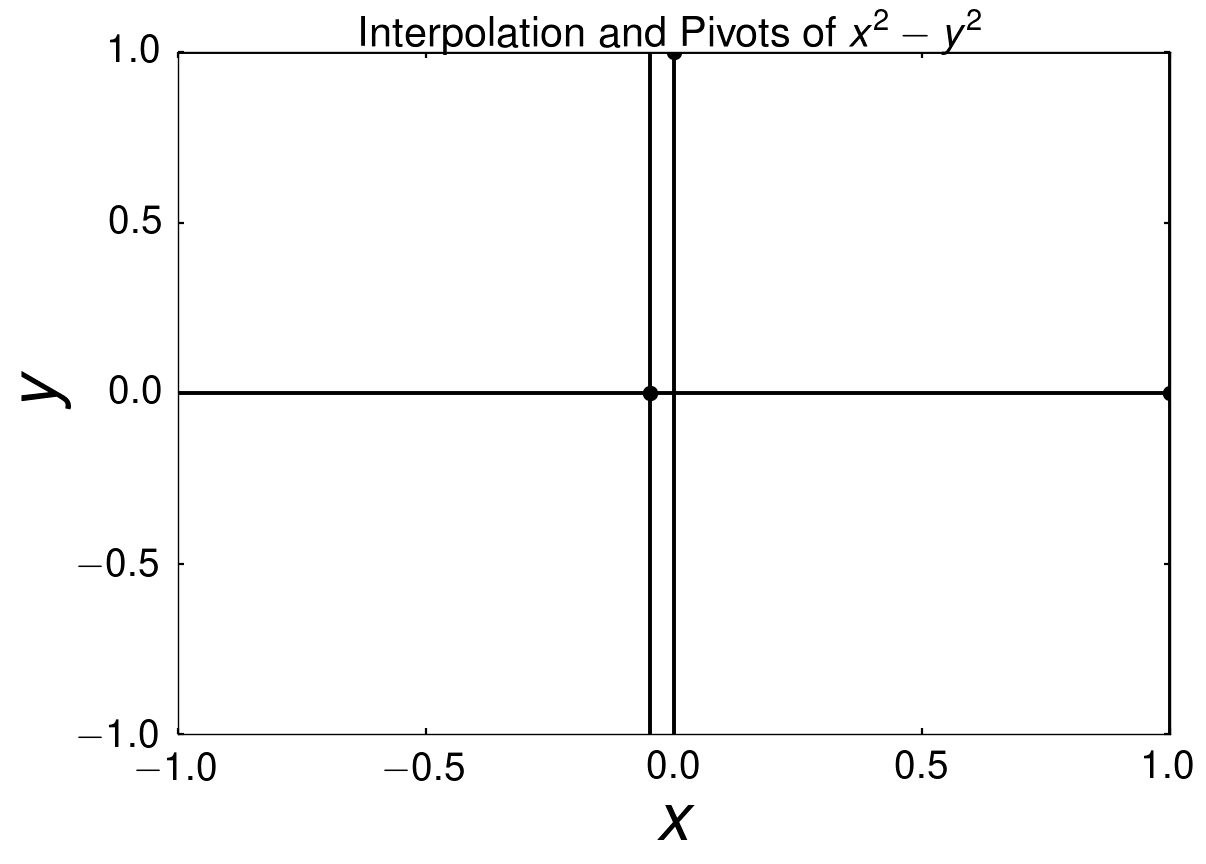

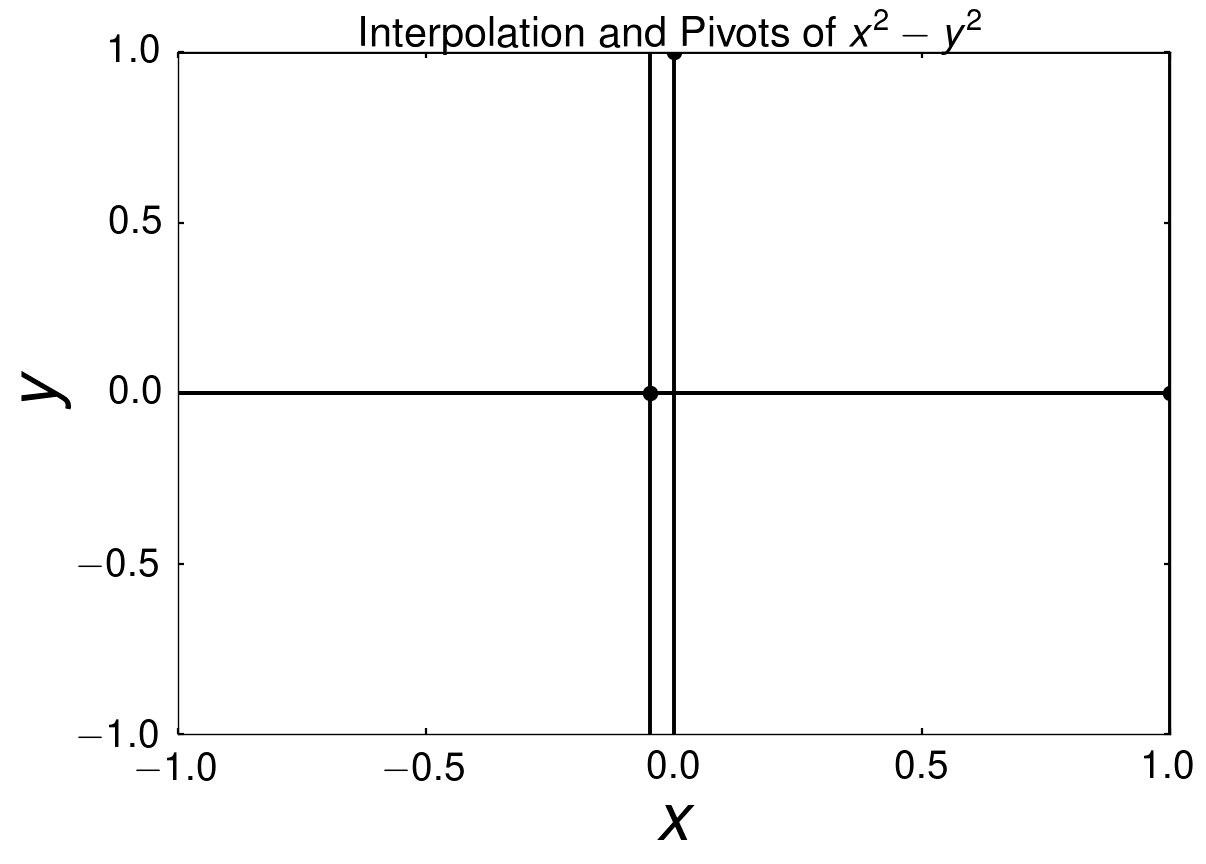

In [137]:
l = -1
r = 1
X, Y = np.meshgrid(np.linspace(l,r,100), np.linspace(l,r,100))
def f(x,y):
    return x**2-y**2
cheb2D = ct.ChebyshevExpansion2D.generate_Chebyshev_expansion2d(64,64,f,-1,1,-1,1)
pivots = ct.ChebyshevExpansion2D.pivots_from_factory(64,64,f,-1,1,-1,1)
pivots_array = np.zeros((2,len(pivots)))
for i in range(len(pivots)):
    pivots_array[0,i] = pivots[i][0]
    pivots_array[1,i] = pivots[i][1]
levels = np.linspace(0,1,30)**2
error =  f(X,Y)
for i in range(-1,len(pivots)-1):
    
    #first plot is just contours of function
    if i==-1:
        plt.figure()
        plt.contour(X,Y,np.abs(error),cmap="bwr",levels = levels)
        plt.ylim([l,r])
        plt.xlim([l,r])
        plt.ylabel(r"$y$")
        plt.xlabel(r"$x$")
        plt.title(r"Interpolation and Pivots of $x^2-y^2$")
        plt.savefig("pivots_animation-"+str(0)+".pdf")
        plt.close()
    
    else:
        plt.figure()
        plt.contour(X,Y,np.abs(error).transpose(),cmap="bwr",levels = levels)
        for j in range(i):
            plt.plot(pivots_array[0,j],pivots_array[1,j],'ok')
            plt.plot(pivots_array[0,j]*np.ones(10),np.linspace(l,r,10),'k')
            plt.plot(np.linspace(l,r,10),pivots_array[1,j]*np.ones(10),'k')
    
        plt.ylim([l,r])
        plt.xlim([l,r])
        plt.ylabel(r"$y$")
        plt.xlabel(r"$x$")
        plt.title(r"Interpolation and Pivots of $x^2-y^2$")
        plt.savefig("pivots_animation-"+str(4*i+1)+".pdf")
        plt.close()
        
        plt.figure()
        plt.contour(X,Y,np.abs(error).transpose(),cmap="bwr",levels = levels)
        for j in range(i):
            plt.plot(pivots_array[0,j],pivots_array[1,j],'ok')
            plt.plot(pivots_array[0,j]*np.ones(10),np.linspace(l,r,10),'k')
            plt.plot(np.linspace(l,r,10),pivots_array[1,j]*np.ones(10),'k')
    
        plt.plot(pivots_array[0,i],pivots_array[1,i],'ok')
        plt.ylim([l,r])
        plt.xlim([l,r])
        plt.ylabel(r"$y$")
        plt.xlabel(r"$x$")
        plt.title(r"Interpolation and Pivots of $x^2-y^2$")
        plt.savefig("pivots_animation-"+str(4*i+2)+".pdf")
        plt.close()
        
        plt.figure()
        plt.contour(X,Y,np.abs(error).transpose(),cmap="bwr",levels = levels)
        for j in range(i):
            plt.plot(pivots_array[0,j],pivots_array[1,j],'ok')
            plt.plot(pivots_array[0,j]*np.ones(10),np.linspace(l,r,10),'k')
            plt.plot(np.linspace(l,r,10),pivots_array[1,j]*np.ones(10),'k')
    
        plt.plot(pivots_array[0,i],pivots_array[1,i],'ok')
        plt.plot(pivots_array[0,i]*np.ones(10),np.linspace(l,r,10),'k')
        plt.ylim([l,r])
        plt.xlim([l,r])
        plt.ylabel(r"$y$")
        plt.xlabel(r"$x$")
        plt.title(r"Interpolation and Pivots of $x^2-y^2$")
        plt.savefig("pivots_animation-"+str(4*i+3)+".pdf")
        plt.close()
        
        plt.figure()
        plt.contour(X,Y,np.abs(error).transpose(),cmap="bwr",levels = levels)
        for j in range(i):
            plt.plot(pivots_array[0,j],pivots_array[1,j],'ok')
            plt.plot(pivots_array[0,j]*np.ones(10),np.linspace(l,r,10),'k')
            plt.plot(np.linspace(l,r,10),pivots_array[1,j]*np.ones(10),'k')
    
        plt.plot(pivots_array[0,i],pivots_array[1,i],'ok')
        plt.plot(pivots_array[0,i]*np.ones(10),np.linspace(l,r,10),'k')
        plt.plot(np.linspace(l,r,10),pivots_array[1,i]*np.ones(10),'k')
        plt.ylim([l,r])
        plt.xlim([l,r])
        plt.ylabel(r"$y$")
        plt.xlabel(r"$x$")
        plt.title(r"Interpolation and Pivots of $x^2-y^2$")
        plt.savefig("pivots_animation-"+str(4*i+4)+".pdf")
        plt.close()
        for x in range(error.shape[0]):
            for y in range(error.shape[1]):
                error[x,y] = f(np.linspace(l,r,100)[x],-np.linspace(l,r,100)[y])
                for k in range(i+1):
                    error[x,y] -= cheb2D.xchebs()[k].y_Clenshaw(np.linspace(l,r,100)[x])*cheb2D.ychebs()[k].y_Clenshaw(-np.linspace(l,r,100)[y])       

In [138]:
l = -1.1
r = 1.1
contour_pts = 50

X, Y = np.meshgrid(np.linspace(l,r,contour_pts), np.linspace(l,r,contour_pts))
def f(x,y):
    r = np.sqrt(x**2+y**2)
    return np.sin(np.pi*r)
cheb2D = ct.ChebyshevExpansion2D.generate_Chebyshev_expansion2d(64,64,f,-1,1,-1,1)
pivots = ct.ChebyshevExpansion2D.pivots_from_factory(64,64,f,-1,1,-1,1)
pivots_array = np.zeros((2,len(pivots)))
for i in range(len(pivots)):
    pivots_array[0,i] = pivots[i][0]
    pivots_array[1,i] = pivots[i][1]
levels = np.linspace(0,1,20)**2
error =  f(X,Y)
for i in range(-1,7):
    
    #first plot is just contours of function
    if i==-1:
        plt.figure()
        plt.contour(X,Y,np.abs(error),cmap="bwr",levels = levels)
        plt.ylim([l,r])
        plt.xlim([l,r])
        plt.ylabel(r"$y$")
        plt.xlabel(r"$x$")
        plt.title(r"Interpolation and Pivots of $\sin\left(\pi\sqrt{x^2+y^2}\right)$")
        plt.savefig("pivots2_animation-"+str(0)+".pdf")
        plt.close()
        
    
    else:
        plt.figure()
        plt.contour(X,Y,np.abs(error).transpose(),cmap="bwr",levels = levels)
        for j in range(i):
            plt.plot(pivots_array[0,j],pivots_array[1,j],'ok')
            plt.plot(pivots_array[0,j]*np.ones(10),np.linspace(l,r,10),'k')
            plt.plot(np.linspace(l,r,10),pivots_array[1,j]*np.ones(10),'k')
    
        plt.ylim([l,r])
        plt.xlim([l,r])
        plt.ylabel(r"$y$")
        plt.xlabel(r"$x$")
        plt.title(r"Interpolation and Pivots of $\sin\left(\pi\sqrt{x^2+y^2}\right)$")
        plt.savefig("pivots2_animation-"+str(4*i+1)+".pdf")
        plt.close()
        
        
        plt.figure()
        plt.contour(X,Y,np.abs(error).transpose(),cmap="bwr",levels = levels)
        for j in range(i):
            plt.plot(pivots_array[0,j],pivots_array[1,j],'ok')
            plt.plot(pivots_array[0,j]*np.ones(10),np.linspace(l,r,10),'k')
            plt.plot(np.linspace(l,r,10),pivots_array[1,j]*np.ones(10),'k')
    
        plt.plot(pivots_array[0,i],pivots_array[1,i],'ok')
        plt.ylim([l,r])
        plt.xlim([l,r])
        plt.ylabel(r"$y$")
        plt.xlabel(r"$x$")
        plt.title(r"Interpolation and Pivots of $\sin\left(\pi\sqrt{x^2+y^2}\right)$")
        plt.savefig("pivots2_animation-"+str(4*i+2)+".pdf")
        plt.close()
        
        
        plt.figure()
        plt.contour(X,Y,np.abs(error).transpose(),cmap="bwr",levels = levels)
        for j in range(i):
            plt.plot(pivots_array[0,j],pivots_array[1,j],'ok')
            plt.plot(pivots_array[0,j]*np.ones(10),np.linspace(l,r,10),'k')
            plt.plot(np.linspace(l,r,10),pivots_array[1,j]*np.ones(10),'k')
    
        plt.plot(pivots_array[0,i],pivots_array[1,i],'ok')
        plt.plot(pivots_array[0,i]*np.ones(10),np.linspace(l,r,10),'k')
        plt.ylim([l,r])
        plt.xlim([l,r])
        plt.ylabel(r"$y$")
        plt.xlabel(r"$x$")
        plt.title(r"Interpolation and Pivots of $\sin\left(\pi\sqrt{x^2+y^2}\right)$")
        plt.savefig("pivots2_animation-"+str(4*i+3)+".pdf")
        plt.close()
        
        
        plt.figure()
        plt.contour(X,Y,np.abs(error).transpose(),cmap="bwr",levels = levels)
        for j in range(i):
            plt.plot(pivots_array[0,j],pivots_array[1,j],'ok')
            plt.plot(pivots_array[0,j]*np.ones(10),np.linspace(l,r,10),'k')
            plt.plot(np.linspace(l,r,10),pivots_array[1,j]*np.ones(10),'k')
    
        plt.plot(pivots_array[0,i],pivots_array[1,i],'ok')
        plt.plot(pivots_array[0,i]*np.ones(10),np.linspace(l,r,10),'k')
        plt.plot(np.linspace(l,r,10),pivots_array[1,i]*np.ones(10),'k')
        plt.ylim([l,r])
        plt.xlim([l,r])
        plt.ylabel(r"$y$")
        plt.xlabel(r"$x$")
        plt.title(r"Interpolation and Pivots of $\sin\left(\pi\sqrt{x^2+y^2}\right)$")
        plt.savefig("pivots2_animation-"+str(4*i+4)+".pdf")
        plt.close()
        for x in range(error.shape[0]):
            for y in range(error.shape[1]):
                error[x,y] = f(np.linspace(l,r,contour_pts)[x],np.linspace(l,r,contour_pts)[y])
                for k in range(i+1):
                    error[x,y] -= cheb2D.xchebs()[k].y_Clenshaw(np.linspace(l,r,contour_pts)[x])*cheb2D.ychebs()[k].y_Clenshaw(np.linspace(l,r,contour_pts)[y])   
                    
                    
                    
                    
                    
                    

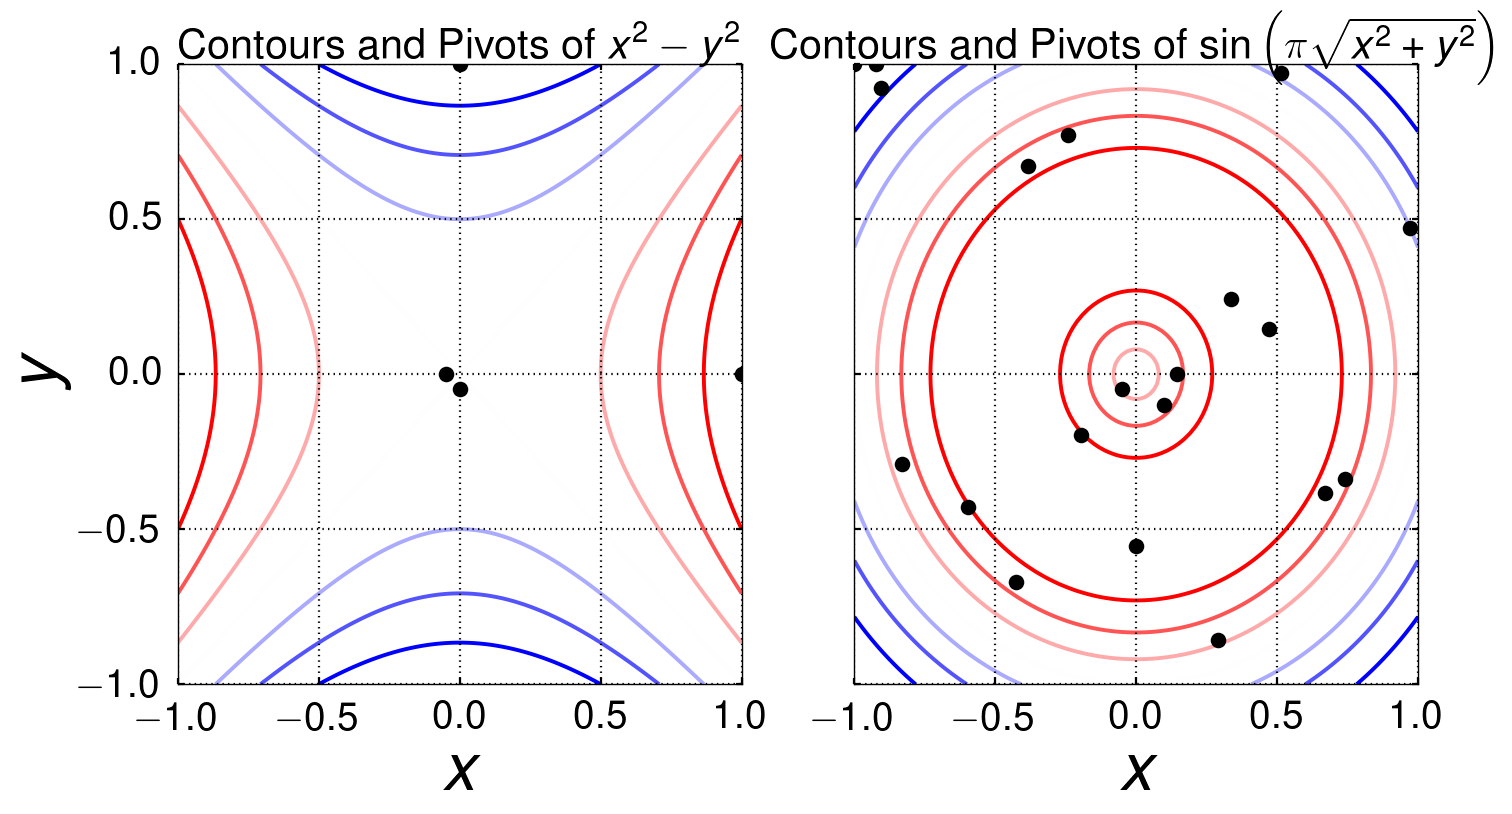

In [139]:
fig, axarr = plt.subplots(1,2,sharey=True,figsize=plt.figaspect(0.5))
def f(x,y):
    r = np.sqrt(x**2+y**2)
    return np.sin(np.pi*r)
pivots = ct.ChebyshevExpansion2D.pivots_from_factory(64,64,f,-1,1,-1,1)
pivots_array = np.zeros((2,len(pivots)))
for i in range(len(pivots)):
    pivots_array[0,i] = pivots[i][0]
    pivots_array[1,i] = pivots[i][1]
X, Y = np.meshgrid(np.linspace(-1,1,100), np.linspace(-1,1,100))
axarr[1].plot(pivots_array[0,:],pivots_array[1,:],'ok')
axarr[1].contour(X,Y,f(X,Y),cmap="bwr")
axarr[1].set_xlim([-1,1])
axarr[1].grid()
axarr[1].set_xlabel(r"$x$")
axarr[1].set_title(r"Contours and Pivots of $\sin\left(\pi\sqrt{x^2+y^2}\right)$")



def f(x,y):
    return x**2-y**2
pivots = ct.ChebyshevExpansion2D.pivots_from_factory(64,64,f,-1,1,-1,1)
pivots_array = np.zeros((2,len(pivots)))
for i in range(len(pivots)):
    pivots_array[0,i] = pivots[i][0]
    pivots_array[1,i] = pivots[i][1]
axarr[0].contour(X,Y,f(X,Y),cmap="bwr")
axarr[0].plot(pivots_array[0,:],pivots_array[1,:],'ok')
axarr[0].grid()
axarr[0].set_ylim([-1,1])
axarr[0].set_ylabel(r"$y$")
axarr[0].set_xlabel(r"$x$")
axarr[0].set_title(r"Contours and Pivots of $x^2-y^2$")
axarr[0].set_xlim([-1,1])
fig.savefig("contours_pivots.pdf")

In [140]:
def f(x,y):
    r = np.sqrt(x**2+y**2)
    return np.sin(np.pi*r)

In [141]:
%timeit chebf = ct.ChebyshevExpansion2D.generate_Chebyshev_expansion2d(64,64,f,-1,1,-1,1)

10 loops, best of 3: 58.6 ms per loop


In [142]:
def f(x,y):
    return x**2-y**2

In [143]:
%timeit chebf = ct.ChebyshevExpansion2D.generate_Chebyshev_expansion2d(64,64,f,-1,1,-1,1)

100 loops, best of 3: 8.56 ms per loop


In [144]:
chebf = ct.ChebyshevExpansion2D.generate_Chebyshev_expansion2d(64,64,f,-1,1,-1,1)
xs = np.linspace(-1,1,100)
ys = np.linspace(-1,1,100)
X, Y = np.meshgrid(xs,ys)
error1 = np.zeros((100,100))
for i in range(len(xs)):
    for j in range(len(ys)):
        error1[i,j] = np.abs(chebf.z_Clenshaw(xs[i],ys[j])-f(xs[i],ys[j]))
        
def f(x,y):
    r = np.sqrt(x**2+y**2)
    return np.sin(np.pi*r)
chebf = ct.ChebyshevExpansion2D.generate_Chebyshev_expansion2d(64,64,f,-1,1,-1,1)
error2 = np.zeros((100,100))
for i in range(len(xs)):
    for j in range(len(ys)):
        error2[i,j] = np.abs(chebf.z_Clenshaw(xs[i],ys[j])-f(xs[i],ys[j]))

In [145]:
from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D

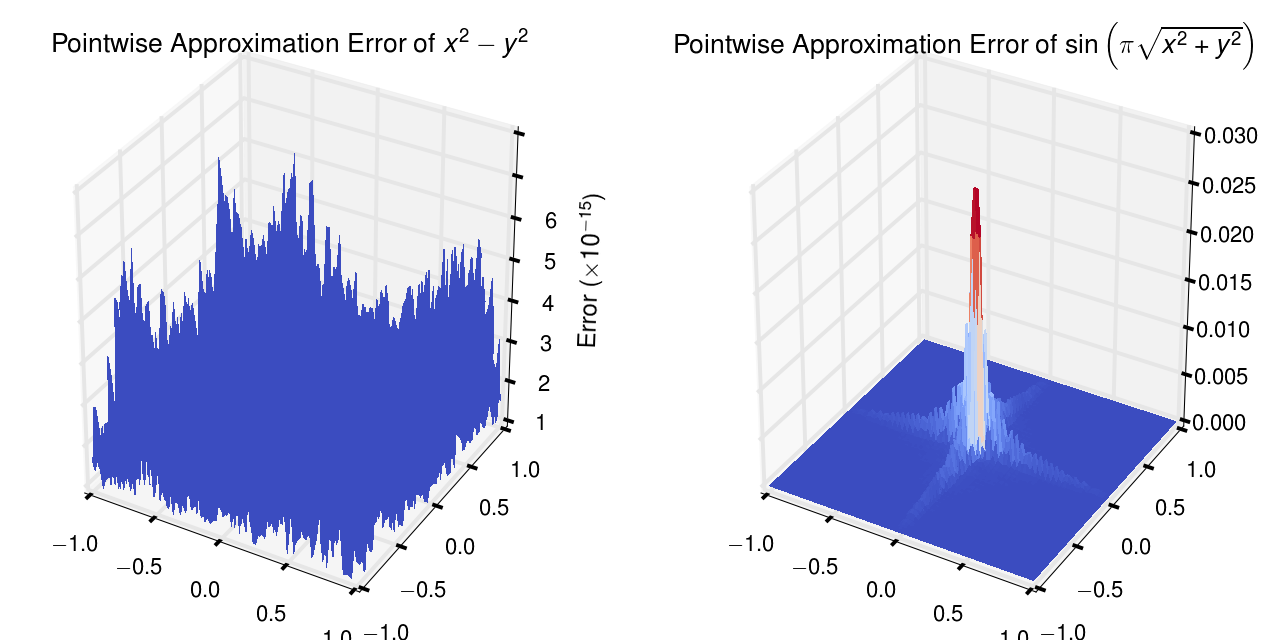

In [148]:
plt.style.use('seaborn-poster')
mpl.rcParams['text.usetex'] = True
mpl.rcParams['text.latex.preamble'] = [
       r'\usepackage{siunitx}',   # i need upright \micro symbols, but you need...
       r'\sisetup{detect-all}',   # ...this to force siunitx to actually use your fonts
       r'\usepackage{helvet}',    # set the normal font here
       r'\usepackage{sansmath}',  # load up the sansmath so that math -> helvet
       r'\sansmath'               # <- tricky! -- gotta actually tell tex to use!
] 
# set up a figure twice as wide as it is tall
fig = plt.figure(figsize=plt.figaspect(0.5))

#===============
#  First subplot
#===============
# set up the axes for the first plot
ax = fig.add_subplot(1, 2, 1, projection='3d')

# plot a 3D surface like in the example mplot3d/surface3d_demo
ax.set_zticklabels([1,2,3,4,5,6])
ax.set_zlabel(r"Error $(\times10^{-15})$",labelpad=20)
ax.set_title(r"Pointwise Approximation Error of $x^2-y^2$")
ax.plot_surface(X, Y, error1, rstride=1, cstride=1, cmap=cm.coolwarm,
                       linewidth=0, antialiased=False,vmin=0,vmax=.025)
#ax.set_zlim3d(0,.025)

#===============
# Second subplot
#===============
# set up the axes for the second plot
ax = fig.add_subplot(1, 2, 2, projection='3d')
ax.set_title(r"Pointwise Approximation Error of $\sin\left(\pi\sqrt{x^2+y^2}\right)$")
#ax.set_zlim3d(0,.025)
ax.plot_surface(X, Y, error2, rstride=1, cstride=1, cmap=cm.coolwarm,
                       linewidth=0, antialiased=False,vmin=0,vmax=.025)
fig.savefig("pointwise_error_surface.pdf")